In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('./weather.csv')

C:\Users\LoG1c\AppData\Local\Temp\ipykernel_6060\24805156.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./weather.csv')


In [3]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(119040, 31)

In [5]:
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [6]:
data.drop(['DR', 'SPD', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE', 'PoorWeather', 'WindGustSpd'], axis=1, inplace=True)

In [7]:
data.shape

(119040, 15)

In [8]:
data.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

In [9]:
for col in ['MAX', 'MIN', 'MEA']:
    mean_value=data[col].mean()
    data[col].fillna(value=mean_value, inplace=True)

In [10]:
data.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX            0
MIN            0
MEA            0
SNF         1163
dtype: int64

In [11]:
numeric_mask = pd.to_numeric(data['Snowfall'], errors='coerce').notna()
data = data[numeric_mask]

In [12]:
data.shape

(117833, 15)

In [13]:
numeric_mask = pd.to_numeric(data['Precip'], errors='coerce').notna()
data = data[numeric_mask]

In [14]:
data.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall',
       'YR', 'MO', 'DA', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'],
      dtype='object')

In [15]:
data.drop(['Date'], axis=1, inplace=True)

In [16]:
numeric_mask = pd.to_numeric(data['Precip'], errors='coerce').notna()
data = data[numeric_mask]

In [17]:
data['STA'].value_counts()

STA
22502    1777
22508    1770
10701    1714
22504    1567
10803    1501
         ... 
44401      44
42206      42
33123      41
34101      31
33121      13
Name: count, Length: 158, dtype: int64

In [18]:
for col in data.columns:
    numeric_mask = pd.to_numeric(data[col], errors='coerce').notna()
    data = data[numeric_mask]

In [19]:
data.shape

(99656, 14)

In [20]:
data.drop(['PRCP'], axis=1, inplace=True)

In [21]:
data.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,MAX,MIN,MEA,SNF
0,10001,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,78.0,72.0,75.0,0.0
1,10001,0,28.888889,21.666667,25.555556,0.0,42,7,2,84.0,71.0,78.0,0.0
2,10001,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,79.0,72.0,76.0,0.0
3,10001,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,80.0,72.0,76.0,0.0
4,10001,0,26.666667,21.666667,24.444444,0.0,42,7,5,80.0,71.0,76.0,0.0


In [22]:
X = data.drop(['Precip'], axis=1)
y = data['Precip']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linear = LinearRegression()

In [27]:
linear.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = linear.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
r_2, rmse = r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)
r_2, rmse

(0.04521565111689663, 138.78316511895474)

In [31]:
for col in X_train.columns:
    X_mod = X_train[col]
    X_mod = X_mod.values
    X_mod = X_mod.reshape(-1, 1)

    X_test_mod = X_test[col]
    X_test_mod = X_test_mod.values
    X_test_mod = X_test_mod.reshape(-1, 1)


    linear = LinearRegression()
    linear.fit(X_mod, y_train)
    y_pred = linear.predict(X_test_mod)
    r_2, rmse = r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)
    print(col , " : R2 Score : " , r_2 , " , RMSE : " , rmse , "\n")


STA  : R2 Score :  -0.00012984363721257886  , RMSE :  145.37438259463073 

MaxTemp  : R2 Score :  7.31399388933518e-05  , RMSE :  145.34487781358558 

MinTemp  : R2 Score :  0.008806242640077788  , RMSE :  144.07547322437432 

MeanTemp  : R2 Score :  0.0017506955611177322  , RMSE :  145.10103586206242 

Snowfall  : R2 Score :  7.015657576536771e-05  , RMSE :  145.34531146185188 

YR  : R2 Score :  -4.892244447485261e-05  , RMSE :  145.36262025346284 

MO  : R2 Score :  0.0017862621240252174  , RMSE :  145.09586606620385 

DA  : R2 Score :  -4.9643816390609885e-05  , RMSE :  145.36272510884487 

MAX  : R2 Score :  6.397670296953706e-05  , RMSE :  145.34620974040834 

MIN  : R2 Score :  0.009810058203658989  , RMSE :  143.92956310208083 

MEA  : R2 Score :  0.0020700046455711663  , RMSE :  145.05462252752932 

SNF  : R2 Score :  7.015657576536771e-05  , RMSE :  145.34531146185188 



In [32]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [33]:
X.shape, y.shape

((99656, 12), (99656,))

degree :  2
R2 Score: 0.0363
RMSE: 11.8352



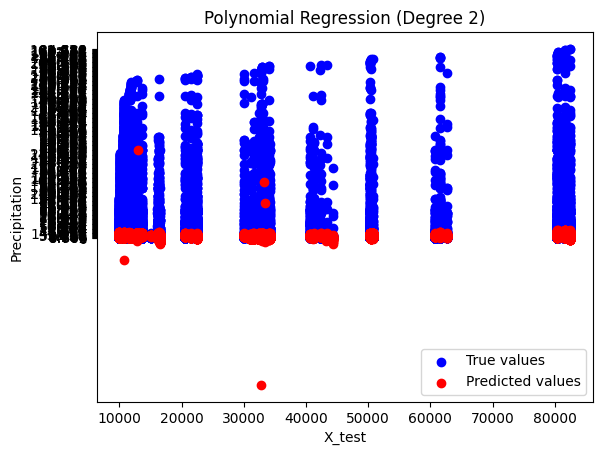

degree :  3
R2 Score: -15925.3923
RMSE: 1521.5087



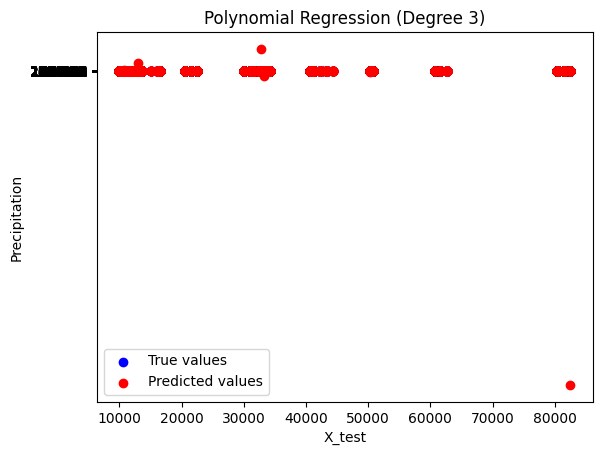

degree :  4
R2 Score: -11528.1371
RMSE: 1294.5361



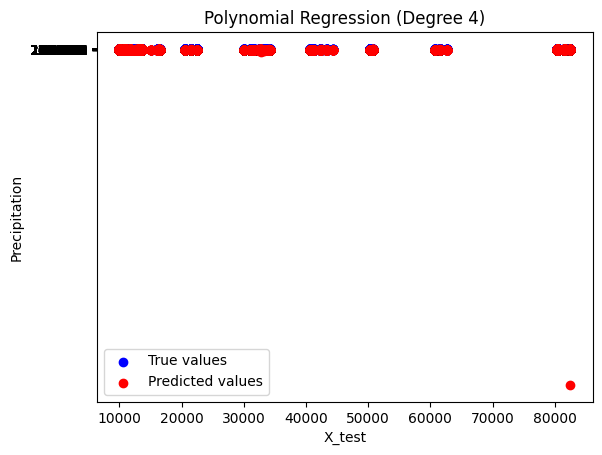

In [37]:
for degree in range(2, 5):
    model = Pipeline([('poly_features', PolynomialFeatures(degree=degree)), ('linear_regression', LinearRegression())])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print("degree : ", degree)
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}\n")

    sorted_indices = np.argsort(X_test.iloc[:, 0])
    plt.scatter(X_test.iloc[sorted_indices, 0], y_test.iloc[sorted_indices], label='True values', color='blue')
    plt.scatter(X_test.iloc[sorted_indices, 0], y_pred[sorted_indices], label='Predicted values', color='red')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('X_test')
    plt.ylabel('Precipitation')
    plt.legend()
    plt.show()